In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import wrangle
import matplotlib.pyplot as plt

## The Objective of this notebook is to show the work used to answer questions contained in an email concerning access to the Codeup curriculum. 

In [2]:
### custom functions to acquire data
df = wrangle.wrangle_logs()

In [3]:
df.head()

,date,time,page,id,cohort,ip,start_date,end_date,program_id,active
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1


## Summary of data acquisition

- Load access logs from .txt file contained in the email
- Load cohort information from SQL database
- Merge tables and convert dates from strings to datetime objects
- Created an 'active' column that says whether the page was viewed while the student was active in the program

# 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [4]:
# using codeup/alumni I was able to determine that program 3
# is datascience, programs 1,2 & 4 are/were webdev

# create separate dataframes for web and DS
web = df[df.program_id != 3]
ds = df[df.program_id == 3]

In [5]:
# program 3 is datascience, programs 1,2 & 4 are webdev
# check webdev first:
web.page.value_counts().head(10)

/                           41955
javascript-i                18973
toc                         18286
search/search_index.json    17316
java-iii                    13729
html-css                    13619
java-ii                     12681
spring                      12518
jquery                      11521
mysql                       11024
Name: page, dtype: int64

#### Top lesson for web dev is Javascript-i

In [6]:
ds.page.value_counts().head(10)

/                                           8358
search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
fundamentals/AI-ML-DL-timeline.jpg          1443
fundamentals/modern-data-scientist.jpg      1438
sql/mysql-overview                          1424
Name: page, dtype: int64

#### Top lesson for Data Science is The Classification overview

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


In [8]:
counts = pd.DataFrame(web.groupby(['page','cohort'])['date'].count()).sort_values('date', ascending=False)

In [9]:
counts

date
page                                           cohort      
/                                              28.0    6340
                                               24.0    2101
                                               53.0    2038
toc                                            62.0    1866
/                                              22.0    1828
...                                                     ...
content/php_ii/control-structures-i/if.html    22.0       1
content/php_ii/control-structures-i/while.html 2.0        1
                                               18.0       1
                                               21.0       1
wp-login                                       22.0       1

[11802 rows x 1 columns]

In [10]:
page_given_cohort = (
    web.groupby('cohort')
    .page.value_counts(normalize=True)
    .rename('proba_page_given_cohort')
    .reset_index()
).sort_values('proba_page_given_cohort', ascending=False)


In [12]:
page_given_cohort['page']

390                                      /
857                       content/html-css
388                      prework/databases
386                                      /
389              prework/versioning/github
                       ...                
7104             4-stats/2.6-compare-means
7105               4-stats/2.7-correlation
7106                               5-stats
7107           5-stats/1-descriptive-stats
7131    8-clustering/End_to_End_Clustering
Name: page, Length: 11802, dtype: object

In [13]:
page_given_cohort[page_given_cohort.page == 'spring'].head()

,cohort,page,proba_page_given_cohort
2139,16.0,spring,0.086093
3265,21.0,spring,0.048898
402,6.0,spring,0.027778
2661,18.0,spring,0.025950
584,8.0,spring,0.025117


#### In WebDev cohort 28's pageviews for spring were nearly double that of the next highest cohort

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [101]:
active = df[df.active == 1]

In [107]:
active.id.value_counts().tail(40)

978    55
46     54
543    53
56     52
960    48
964    45
971    44
371    42
981    42
959    41
967    41
529    36
973    35
972    34
976    29
41     28
24     26
772    26
64     25
49     25
961    20
340    18
963    18
968    17
487    17
889    16
697    13
572    12
941    12
679    11
388     8
812     7
956     6
539     5
278     4
832     3
879     1
940     1
918     1
619     1
Name: id, dtype: int64

In [115]:
df.id.value_counts().tail(40)

107    8
388    8
104    8
401    7
115    6
956    6
152    5
169    5
399    5
82     5
71     5
85     4
857    4
216    4
246    4
62     4
980    3
832    3
81     3
89     3
348    3
176    3
177    3
852    2
97     2
573    2
574    2
649    1
940    1
165    1
879    1
652    1
592    1
619    1
593    1
66     1
163    1
918    1
212    1
952    1
Name: id, dtype: int64

In [119]:
df[df.id == 388]

,date,time,page,id,cohort,ip,start_date,end_date,program_id,active
221780,2019-03-19,09:50:19,/,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221782,2019-03-19,09:50:23,html-css,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221784,2019-03-19,09:50:28,html-css/elements,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221827,2019-03-19,10:04:11,html-css/elements,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221841,2019-03-19,10:19:32,html-css/elements,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221951,2019-03-19,11:11:51,html-css/forms,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221952,2019-03-19,11:12:02,html-css/elements,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
222154,2019-03-19,12:19:23,html-css/elements,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1


#### The 20 active students who accessed the curriculum the least accessed curriculum on their cohort's start date, possibly for a few days after, and then do not access again.  They also do not have any access attempts while inactive.

# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?


In [195]:
def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def prep(df, user):
    df = df[df.id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages = df['page'].resample('d').count()
    return pages

def plt_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anom(df, user, span, weight):
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    # plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]

In [201]:
span = 30
weight = 3.5
anom = pd.DataFrame()
for u in list(df.id.unique()):
    user_df = find_anom(df, u, span, weight)
    anom = pd.concat([anom, user_df], axis=0)

In [258]:
views = anom.pages.value_counts(sort=False)

In [270]:
anom[anom.pages == 198]

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138


In [275]:
df[(df.id == 138) & (df.active==1)].set_index('date')

,time,page,id,cohort,ip,start_date,end_date,program_id,active
date,,,,,,,,,
2018-03-09,09:33:19,slides/annotations,138,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1
2018-03-09,09:36:13,java-ii/annotations,138,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1
2018-03-09,09:45:18,mkdocs/search_index.json,138,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1
2018-03-09,09:45:33,appendix,138,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1
2018-03-09,09:45:39,appendix/git/intellij,138,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1
...,...,...,...,...,...,...,...,...,...
2018-05-09,17:17:29,spring/extra-features/form-validation,138,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1
2018-05-10,00:05:25,/,138,22.0,108.65.244.91,2018-01-08,2018-05-17,2.0,1
2018-05-10,10:11:07,appendix/capstone-workbook,138,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1


<AxesSubplot:xlabel='date'>

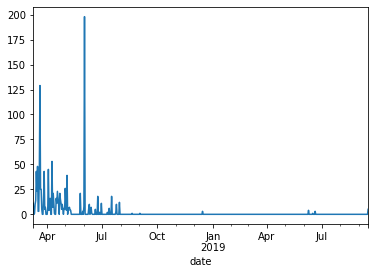

In [273]:
df[df.id==138].set_index('date').page.resample('d').count().plot()

#### User 341 graduated in Jun 2019 and continued to access pages occaisionally afterwareds, but nothing too strange

#### User 138 had almost 200 views in one day

# 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


In [242]:
ds_ids = ds.id.unique()
web_ids = web.id.unique()

In [245]:
both = list(set(ds_ids).intersection(web_ids))

In [249]:
both_df = df[df.id.isin(both)].set_index('date')

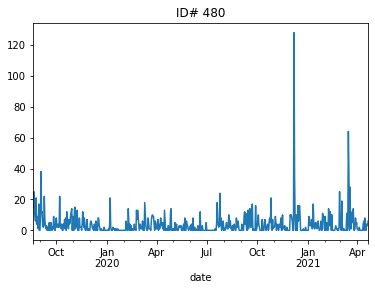

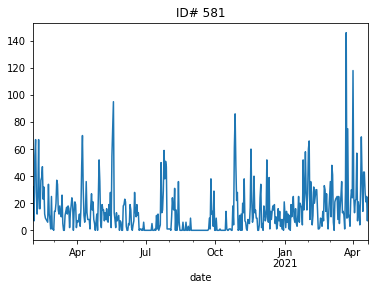

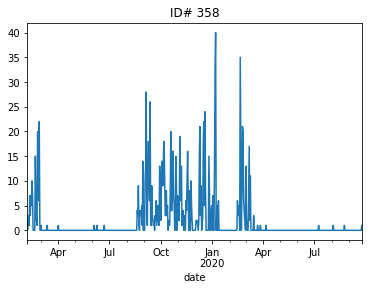

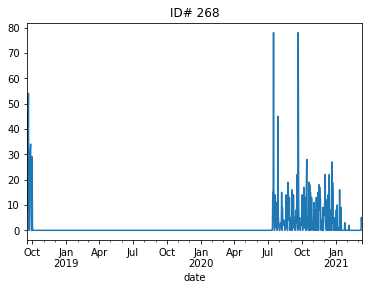

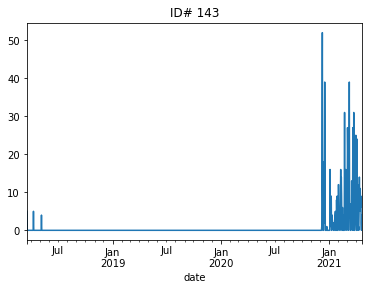

In [252]:
for ids in both:
    both_df[both_df.id == ids].page.resample('d').count().plot()
    plt.title(f'ID# {ids}')
    plt.show()
    

In [253]:
both_df

,time,page,id,cohort,ip,start_date,end_date,program_id,active
date,,,,,,,,,
2018-03-18,15:24:59,index.html,143,16.0,173.174.192.127,2016-10-26,2017-03-09,2.0,0
2018-03-18,15:25:01,mysql,143,16.0,173.174.192.127,2016-10-26,2017-03-09,2.0,0
2018-03-18,15:25:04,mysql/introduction,143,16.0,173.174.192.127,2016-10-26,2017-03-09,2.0,0
2018-03-18,15:25:05,mysql/users,143,16.0,173.174.192.127,2016-10-26,2017-03-09,2.0,0
2018-03-18,15:25:07,mysql/introduction,143,16.0,173.174.192.127,2016-10-26,2017-03-09,2.0,0
...,...,...,...,...,...,...,...,...,...
2021-04-21,11:09:42,python/advanced-dataframes,581,28.0,70.112.179.142,2014-02-04,2014-02-04,2.0,0
2021-04-21,11:13:36,python/dataframes,480,28.0,75.1.166.163,2014-02-04,2014-02-04,2.0,0
2021-04-21,11:13:39,python/series,480,28.0,75.1.166.163,2014-02-04,2014-02-04,2.0,0


# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


In [234]:
inactive[inactive.program_id != 3].page.value_counts()

/                                                               18547
javascript-i                                                     5745
search/search_index.json                                         5666
spring                                                           4902
html-css                                                         4186
                                                                ...  
users/913                                                           1
bayes-capstones/html                                                1
bayes-capstones                                                     1
content/examples/php/arithmetic.php                                 1
appendix/professional-development/post-interview-review-form        1
Name: page, Length: 1925, dtype: int64

#### For webdev the most common topics for graduates to reference are Javascript-i and spring

In [238]:
inactive[inactive.program_id == 3].page.value_counts()

/                                           1436
search/search_index.json                     493
sql/mysql-overview                           275
classification/overview                      266
classification/scale_features_or_not.svg     219
                                            ... 
DataToAction_v2.jpg                            1
advanced-topics/tidy-data                      1
10-anomaly-detection/isolation-forests         1
cli/moving-files                               1
individual-project/individual-project          1
Name: page, Length: 437, dtype: int64

#### For Data Science the most common topics for graduates to reference are sql and classification

# 7. Which lessons are least accessed? 


In [230]:
df.page.value_counts().tail

5-stats/2.1-probability_and_event_interactions                  1
DataSets_SaaSCustomerChurn                                      1
8_ts_split                                                      1
merge_Ensemble                                                  1
python/custom-sorting-functions                                 1
                                                               ..
javascript/loops                                                1
content/control-structures-ii                                   1
javascript-ii/promisesdfghjkjhgfs                               1
app                                                             1
appendix/professional-development/post-interview-review-form    1
Name: page, Length: 100, dtype: int64

In [18]:
counts = pd.DataFrame(df.page.value_counts())

In [20]:
counts[counts.page == 1]

,page
appendix/open_data/www.flickr.com/services/api,1
capstone/53,1
java-iii/jdbc/poop,1
capstone/52,1
bom-and-dom/dom-events,1
...,...
javascript/loops,1
content/control-structures-ii,1
javascript-ii/promisesdfghjkjhgfs,1
app,1
